In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor

from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

import geopandas
import geopy

warnings.filterwarnings("ignore")

In [3]:
df_day = pd.read_csv('day.csv')
df_hour = pd.read_csv('hour.csv')

In [4]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
df_hour.set_index('instant',inplace=True)
df_hour.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
df_day.shape

(731, 16)

In [7]:
df_hour.shape

(17379, 16)

In [8]:
df_hour.dtypes

dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

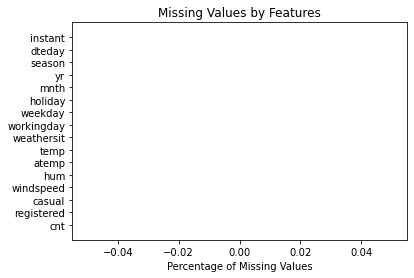

In [9]:
# plotting missing values for daily data
fig, ax = plt.subplots()

missing_value_df = pd.DataFrame({'column_name': df_day.columns,
                                 'percent_missing': percent_missing})

missing_value_df = df_day.columns
percent_missing = df_day.isnull().sum() * 100 / len(df_day)

ax.barh(missing_value_df, percent_missing, align='center')
ax.set_yticks(missing_value_df)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Percentage of Missing Values')
ax.set_title('Missing Values by Features')

plt.show()

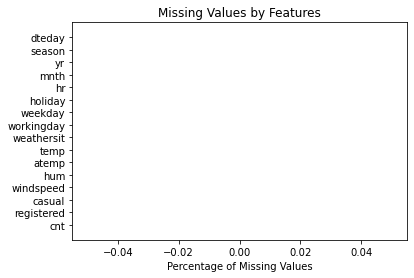

In [11]:
# plotting missing values for hourly data
fig, ax = plt.subplots()

missing_value_df = pd.DataFrame({'column_name': df_hour.columns,
                                 'percent_missing': percent_missing})

missing_value_df = df_hour.columns
percent_missing = df_hour.isnull().sum() * 100 / len(df_hour)

ax.barh(missing_value_df, percent_missing, align='center')
ax.set_yticks(missing_value_df)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Percentage of Missing Values')
ax.set_title('Missing Values by Features')

plt.show()

In [12]:
weekday_dict = {0: "Sunday" ,1: "Monday", 2:"Tuesday" ,3: "Wednesday",4: "Thursday" ,5: "Friday",6:"Saturday"}
season_dict = {1:"Winter", 2:"Spring", 3:"Summer", 4:"Fall"}
holiday_dict = {1:"Workday", 0:"Weekend or Holiday"}

In [13]:
df_hour['weekday_label']= df_hour['weekday'].map(weekday_dict)
df_hour['season_label']= df_hour['season'].map(season_dict)
df_hour['holiday_label']= df_hour['workingday'].map(holiday_dict)
df_hour.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weekday_label,season_label,holiday_label
instant,,,,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,Saturday,Winter,Weekend or Holiday
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,Saturday,Winter,Weekend or Holiday
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,Saturday,Winter,Weekend or Holiday
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,Saturday,Winter,Weekend or Holiday
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,Saturday,Winter,Weekend or Holiday


In [14]:
df_hour_copy = df_hour.copy(deep=True)
df_hour_copy
#df_hour_copy.set_index('instant',inplace=True)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weekday_label,season_label,holiday_label
instant,,,,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,Saturday,Winter,Weekend or Holiday
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,Saturday,Winter,Weekend or Holiday
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,Saturday,Winter,Weekend or Holiday
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,Saturday,Winter,Weekend or Holiday
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,Saturday,Winter,Weekend or Holiday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,Monday,Winter,Workday
17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,Monday,Winter,Workday
17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,Monday,Winter,Workday


[Text(0.5, 0, 'Working Day'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Ride Count by Working Day')]

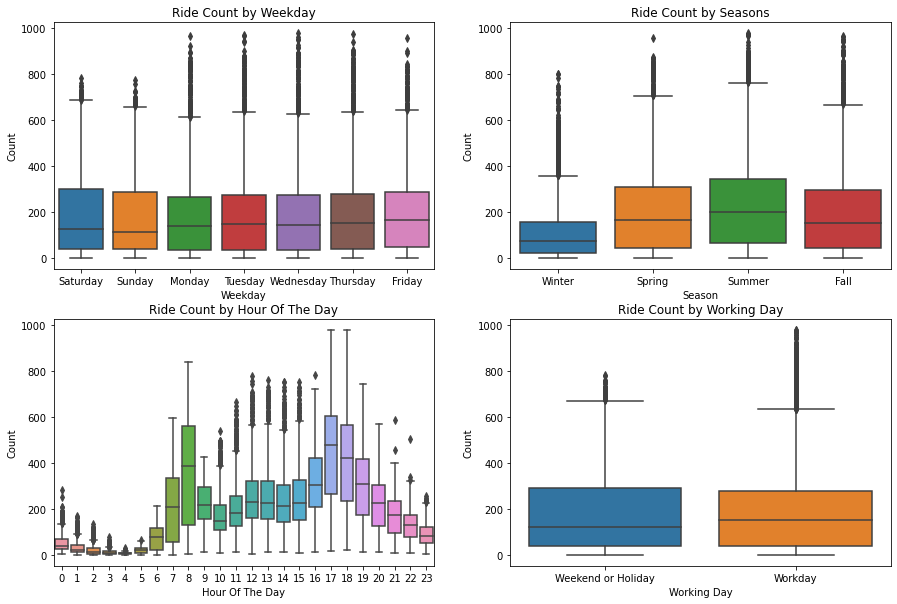

In [15]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(15, 10)

g = sns.boxplot(data=df_hour,y="cnt", x= "weekday_label", orient="v",ax=axes[0][0])
sns.boxplot(data=df_hour,y="cnt",x="season_label",orient="v",ax=axes[0][1])
sns.boxplot(data=df_hour,y="cnt",x="hr",orient="v",ax=axes[1][0])
sns.boxplot(data=df_hour,y="cnt",x="holiday_label",orient="v",ax=axes[1][1])

axes[0][0].set(xlabel='Weekday', ylabel='Count',title="Ride Count by Weekday")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Ride Count by Seasons")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Ride Count by Hour Of The Day")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Ride Count by Working Day")

<AxesSubplot:>

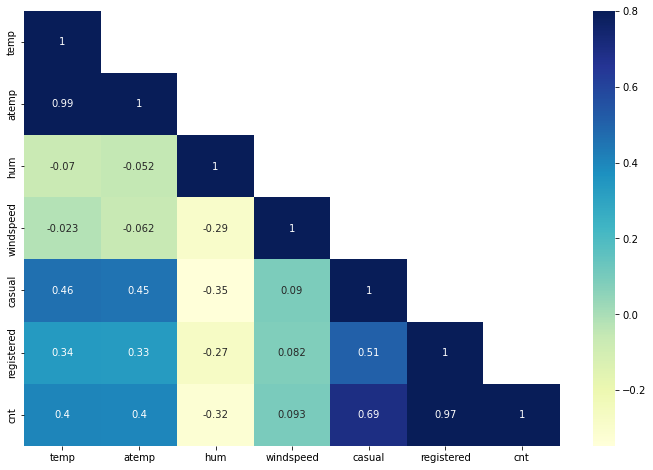

In [16]:
corr = df_hour[["temp","atemp","hum","windspeed","casual", "registered", "cnt"]].corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(12,8)
sns.heatmap(corr, mask=mask,vmax=.8,annot=True, cmap='YlGnBu')

In [17]:
df_hour = df_hour.drop(['dteday', 'atemp', 'casual', 'registered', 'weekday_label', 'season_label', 'holiday_label'], axis=1)
df_hour.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
instant,,,,,,,,,,,,
1,1,0,1,0,0,6,0,1,0.24,0.81,0.0,16
2,1,0,1,1,0,6,0,1,0.22,0.80,0.0,40
3,1,0,1,2,0,6,0,1,0.22,0.80,0.0,32
4,1,0,1,3,0,6,0,1,0.24,0.75,0.0,13
5,1,0,1,4,0,6,0,1,0.24,0.75,0.0,1


In [18]:
season=pd.get_dummies(df_hour['season'],prefix='season')
df_hour=pd.concat([df_hour,season],axis=1)
weather=pd.get_dummies(df_hour['weathersit'],prefix='weather')
df_hour=pd.concat([df_hour,weather],axis=1)

df_hour.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
instant,,,,,,,,,,,,,,,,,,,,
1,1,0,1,0,0,6,0,1,0.24,0.81,0.0,16,1,0,0,0,1,0,0,0
2,1,0,1,1,0,6,0,1,0.22,0.80,0.0,40,1,0,0,0,1,0,0,0
3,1,0,1,2,0,6,0,1,0.22,0.80,0.0,32,1,0,0,0,1,0,0,0
4,1,0,1,3,0,6,0,1,0.24,0.75,0.0,13,1,0,0,0,1,0,0,0
5,1,0,1,4,0,6,0,1,0.24,0.75,0.0,1,1,0,0,0,1,0,0,0


In [19]:
df_hour = df_hour.drop(['season', 'weathersit'], axis=1)
df_hour.head()

,yr,mnth,hr,holiday,weekday,workingday,temp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
instant,,,,,,,,,,,,,,,,,,
1,0,1,0,0,6,0,0.24,0.81,0.0,16,1,0,0,0,1,0,0,0
2,0,1,1,0,6,0,0.22,0.80,0.0,40,1,0,0,0,1,0,0,0
3,0,1,2,0,6,0,0.22,0.80,0.0,32,1,0,0,0,1,0,0,0
4,0,1,3,0,6,0,0.24,0.75,0.0,13,1,0,0,0,1,0,0,0
5,0,1,4,0,6,0,0.24,0.75,0.0,1,1,0,0,0,1,0,0,0


In [21]:
categorical_variable = ['season_1', 'season_2','season_3','season_4', 'weather_1', 'weather_2',
                        'weather_3','weather_4','weekday', 'yr', 'mnth','hr','holiday', 'workingday']

for var in categorical_variable:
  df_hour[var] = pd.Categorical(df_hour[var])

df_hour.dtypes

yr            category
mnth          category
hr            category
holiday       category
weekday       category
workingday    category
temp           float64
hum            float64
windspeed      float64
cnt              int64
season_1      category
season_2      category
season_3      category
season_4      category
weather_1     category
weather_2     category
weather_3     category
weather_4     category
dtype: object

In [22]:
X_train,X_test,y_train,y_test = train_test_split(df_hour.drop('cnt',axis=1),df_hour['cnt'],
                                                 test_size=0.25,random_state=42)

In [23]:
#linear regression
lin_reg = LinearRegression()

# Train the model
#yLabelsLog = np.log1p(yLabels)
lin_reg.fit(X = X_train,y = y_train)

#Predict
y_pred_test = lin_reg.predict(X_test)
y_pred_train = lin_reg.predict(X_train)

In [24]:
# The coefficients
print('Coefficients: \n', lin_reg.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred_test))
# The coefficient of determination
print('(R^2)Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred_test))
#adjusted r-s2quared
print('Adjusted R-squared: %.2f'
% (1 - (1-lin_reg.score(X_test, y_pred_test))*(len(y_pred_test)-1)/(len(y_pred_test)-X_test.shape[1]-1)))
#rmse
print('RMSE: %.2f'
      % np.sqrt(mean_squared_error(y_test, y_pred_test)))
#mean squared log error
#print('Mean squared log error: %.2f'
      #% np.sqrt(mean_squared_log_error(y_test,y_pred)))

Coefficients: 
 [ 8.09285689e+01  4.98450378e-04  7.56287741e+00 -2.88342357e+01
  1.68249104e+00  2.04119839e+00  3.49351739e+02 -1.92127991e+02
  2.28764570e+01 -2.07653168e+01  9.60582343e-01 -2.50580260e+01
  4.48627604e+01 -5.54219204e+00  2.14564846e+00 -3.15671095e+01
  3.49636530e+01]
Mean squared error: 19441.96
(R^2)Coefficient of determination: 0.40
Adjusted R-squared: 1.00
RMSE: 139.43


In [25]:
#Random Forest
param_grid = {'n_estimators':[10, 50, 100, 500] , 'max_depth':[3, 5, 8]}

# Create random forest regressor
RF_model = GridSearchCV(RandomForestRegressor(random_state = 42),param_grid)
RF_model.fit(X_train,y_train)
y_pred_test = RF_model.predict(X_test)
y_pred_train = RF_model.predict(X_train)

In [26]:
# The coefficients
#print('Coefficients: \n', lin_reg.coef_)
# The mean squared error
#print('Mean squared error: %.2f'
     # % mean_squared_error(y_test, y_pred))
# The coefficient of determination
print('(R^2)Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred_test))
#adjusted r-s2quared
#print('Adjusted R-squared: %.2f'
#% (1 - (1-lin_reg.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)))
#rmse
#print('RMSE: %.2f'
      #% np.sqrt(mean_squared_error(y_test, y_pred)))
#mean squared log error
#print('Mean squared log error: %.2f'
      #% np.sqrt(mean_squared_log_error(y_test,y_pred)))

(R^2)Coefficient of determination: 0.88


In [27]:
df_hour_copy.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weekday_label,season_label,holiday_label
instant,,,,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,Saturday,Winter,Weekend or Holiday
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,Saturday,Winter,Weekend or Holiday
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,Saturday,Winter,Weekend or Holiday
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,Saturday,Winter,Weekend or Holiday
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,Saturday,Winter,Weekend or Holiday


In [28]:
df_hour_copy['y_pred'] = np.hstack([y_pred_train, y_pred_test])

In [29]:
df_hour_copy

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weekday_label,season_label,holiday_label,y_pred
instant,,,,,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,Saturday,Winter,Weekend or Holiday,72.015111
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,Saturday,Winter,Weekend or Holiday,247.103351
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,Saturday,Winter,Weekend or Holiday,257.082239
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,Saturday,Winter,Weekend or Holiday,25.051266
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,Saturday,Winter,Weekend or Holiday,257.082239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,Monday,Winter,Workday,16.790375
17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,Monday,Winter,Workday,181.857546
17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,Monday,Winter,Workday,91.926105


In [ ]:
#df_hour_copy.to_excel("/content/gdrive/My Drive/prediction_output.xlsx")

In [30]:
#df_hour_copy.to_csv("/content/gdrive/My Drive/prediction_output.csv")

# **Getting Pincode Information Using geocode API**

In [34]:
import pandas as pd
import geopandas as gpd
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import matplotlib.pyplot as plt
import folium
from folium.plugins import FastMarkerCluster

In [35]:
import requests
response = requests.get('https://google.com/')
print(response)

<Response [200]>


In [36]:
# https://ride.capitalbikeshare.com/system-data

In [38]:
df_location = pd.read_csv('2011-capitalbikeshare-tripdata.csv')

In [39]:
df_location.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,3548,2011-01-01 00:01:29,2011-01-01 01:00:37,31620,5th & F St NW,31620,5th & F St NW,W00247,Member
1,346,2011-01-01 00:02:46,2011-01-01 00:08:32,31105,14th & Harvard St NW,31101,14th & V St NW,W00675,Casual
2,562,2011-01-01 00:06:13,2011-01-01 00:15:36,31400,Georgia & New Hampshire Ave NW,31104,Adams Mill & Columbia Rd NW,W00357,Member
3,434,2011-01-01 00:09:21,2011-01-01 00:16:36,31111,10th & U St NW,31503,Florida Ave & R St NW,W00970,Member
4,233,2011-01-01 00:28:26,2011-01-01 00:32:19,31104,Adams Mill & Columbia Rd NW,31106,Calvert & Biltmore St NW,W00346,Casual


In [45]:
geopy.geocoders.options.default_user_agent = "my-application"
locator = Nominatim(user_agent="krystalzhuo@gmail.com")
#Nominatim(user_agent='my-application')
location = locator.geocode('Champ de Mars, Paris, France')

In [46]:
print(location.address)
print("Latitude = {}, Longitude = {}".format(location.latitude, location.longitude))

Champ de Mars, Avenue Joseph Bouvard, Quartier du Gros-Caillou, Paris 7e Arrondissement, Paris, Île-de-France, France métropolitaine, 75007, France
Latitude = 48.85614465, Longitude = 2.297820393322227


Extracting Pincodes for Start Station

In [47]:
df_start_station = df_location[['Start station']].copy()
df_start_station

,Start station
0,5th & F St NW
1,14th & Harvard St NW
2,Georgia & New Hampshire Ave NW
3,10th & U St NW
4,Adams Mill & Columbia Rd NW
...,...
1226762,15th & P St NW
1226763,Convention Center / 7th & M St NW
1226764,Lamont & Mt Pleasant NW
1226765,21st & I St NW


In [ ]:
from geopy.extra.rate_limiter import RateLimiter

locator = Nominatim(user_agent='krystalzhuo@gmail.com')
# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
# 2- - create location column
df_start_station['location'] = df_start_station['Start station'].apply(geocode)
# 3 - create longitude, laatitude and altitude from location column (returns tuple)
df_start_station['point'] = df_start_station['location'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
df_start_station[['latitude', 'longitude']] = pd.DataFrame(df_start_station['point'].tolist(), 
                                                           index=df_start_station.index)

RateLimiter caught an error, retrying (0/2 tries). Called with (*('5th & F St NW',), **{}).
Traceback (most recent call last):
  File "/Users/albertx/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/albertx/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/albertx/opt/anaconda3/lib/python3.7/http/client.py", line 1344, in getresponse
    response.begin()
  File "/Users/albertx/opt/anaconda3/lib/python3.7/http/client.py", line 306, in begin
    version, status, reason = self._read_status()
  File "/Users/albertx/opt/anaconda3/lib/python3.7/http/client.py", line 267, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/albertx/opt/anaconda3/lib/python3.7/socket.py", line 589, in readinto
    return self._sock.recv_int

RateLimiter swallowed an error after 2 retries. Called with (*('5th & F St NW',), **{}).
Traceback (most recent call last):
  File "/Users/albertx/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/albertx/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/albertx/opt/anaconda3/lib/python3.7/http/client.py", line 1344, in getresponse
    response.begin()
  File "/Users/albertx/opt/anaconda3/lib/python3.7/http/client.py", line 306, in begin
    version, status, reason = self._read_status()
  File "/Users/albertx/opt/anaconda3/lib/python3.7/http/client.py", line 267, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/albertx/opt/anaconda3/lib/python3.7/socket.py", line 589, in readinto
    return self._sock.recv_into(b

RateLimiter caught an error, retrying (1/2 tries). Called with (*('14th & Harvard St NW',), **{}).
Traceback (most recent call last):
  File "/Users/albertx/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/albertx/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/albertx/opt/anaconda3/lib/python3.7/http/client.py", line 1344, in getresponse
    response.begin()
  File "/Users/albertx/opt/anaconda3/lib/python3.7/http/client.py", line 306, in begin
    version, status, reason = self._read_status()
  File "/Users/albertx/opt/anaconda3/lib/python3.7/http/client.py", line 267, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/albertx/opt/anaconda3/lib/python3.7/socket.py", line 589, in readinto
    return self._sock.r

RateLimiter caught an error, retrying (0/2 tries). Called with (*('14th & R St NW',), **{}).
Traceback (most recent call last):
  File "/Users/albertx/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/albertx/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/albertx/opt/anaconda3/lib/python3.7/http/client.py", line 1344, in getresponse
    response.begin()
  File "/Users/albertx/opt/anaconda3/lib/python3.7/http/client.py", line 306, in begin
    version, status, reason = self._read_status()
  File "/Users/albertx/opt/anaconda3/lib/python3.7/http/client.py", line 267, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/albertx/opt/anaconda3/lib/python3.7/socket.py", line 589, in readinto
    return self._sock.recv_in

RateLimiter swallowed an error after 2 retries. Called with (*('14th & R St NW',), **{}).
Traceback (most recent call last):
  File "/Users/albertx/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/albertx/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/albertx/opt/anaconda3/lib/python3.7/http/client.py", line 1344, in getresponse
    response.begin()
  File "/Users/albertx/opt/anaconda3/lib/python3.7/http/client.py", line 306, in begin
    version, status, reason = self._read_status()
  File "/Users/albertx/opt/anaconda3/lib/python3.7/http/client.py", line 267, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/albertx/opt/anaconda3/lib/python3.7/socket.py", line 589, in readinto
    return self._sock.recv_into(

RateLimiter caught an error, retrying (1/2 tries). Called with (*('14th & R St NW',), **{}).
Traceback (most recent call last):
  File "/Users/albertx/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/albertx/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/albertx/opt/anaconda3/lib/python3.7/http/client.py", line 1344, in getresponse
    response.begin()
  File "/Users/albertx/opt/anaconda3/lib/python3.7/http/client.py", line 306, in begin
    version, status, reason = self._read_status()
  File "/Users/albertx/opt/anaconda3/lib/python3.7/http/client.py", line 267, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/albertx/opt/anaconda3/lib/python3.7/socket.py", line 589, in readinto
    return self._sock.recv_in

RateLimiter caught an error, retrying (0/2 tries). Called with (*('14th & Harvard St NW',), **{}).
Traceback (most recent call last):
  File "/Users/albertx/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/albertx/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/albertx/opt/anaconda3/lib/python3.7/http/client.py", line 1344, in getresponse
    response.begin()
  File "/Users/albertx/opt/anaconda3/lib/python3.7/http/client.py", line 306, in begin
    version, status, reason = self._read_status()
  File "/Users/albertx/opt/anaconda3/lib/python3.7/http/client.py", line 267, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/albertx/opt/anaconda3/lib/python3.7/socket.py", line 589, in readinto
    return self._sock.r

In [ ]:
df_start_station.head()

In [ ]:
df_start_station_null = df_start_station['location'].isna().copy(deep = True)

In [ ]:
df_start_station_null['Start station'] = df_start_station_null['Start station'].str.replace('&', 'and')
df_start_station_null

Extracting pincode for End Station

In [ ]:
df_end_station = df_location[['End station']].copy()
df_end_station

In [ ]:
df_end_station['End station'] = df_start_station['End station'].str.replace('&', 'and')
df_end_station

In [ ]:
from geopy.extra.rate_limiter import RateLimiter
from geopy.geocoders import Nominatim

locator = Nominatim(user_agent='my-application')
# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
# 2- - create location column
df_end_station['location'] = df_end_station['Start station'].apply(geocode)
# 3 - create longitude, laatitude and altitude from location column (returns tuple)
df_end_station['point'] = df_end_station['location'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
df_end_station[['latitude', 'longitude']] = pd.DataFrame(df_end_station['point'].tolist(), index=df_end_station.index)

In [ ]:
df_end_station.head()